### Baseline Model for improvement purpose

Part of the code is helped by GPT

In [1]:
import pandas as pd

# Load the Excel file and inspect the 'Train' and 'Predict' sheets
file_path = 'data\Wind_data.xlsx'
train_data = pd.read_excel(file_path, sheet_name='Train')
predict_data = pd.read_excel(file_path, sheet_name='Predict')

# Display the first few rows of the 'Train' and 'Predict' sheets to understand the structure
train_data.head(), predict_data.head()


(             DATETIME        CF  WS_1133733  WS_1156770  WS_1156968  \
 0 2019-08-07 00:00:00  0.652524       10.35        8.99        4.57   
 1 2019-08-07 01:00:00  0.605852        9.70        8.28        5.78   
 2 2019-08-07 02:00:00  0.564094        9.04        7.39        6.21   
 3 2019-08-07 03:00:00  0.532721        8.78        7.49        6.43   
 4 2019-08-07 04:00:00  0.495608        8.23        6.88        6.81   
 
    WS_1182195  WS_1193865  WS_1321569  WS_1324653  WS_1358699  ...  WS_78208  \
 0        9.69        8.90        2.90        5.74        1.16  ...     11.12   
 1        9.10        7.98        2.23        3.46        0.97  ...     10.47   
 2        8.98        7.78        1.98        2.62        0.92  ...     10.10   
 3        8.84        7.82        1.33        2.43        0.68  ...      9.67   
 4        8.52        6.65        1.64        2.45        0.59  ...      9.24   
 
    WS_811655  WS_839753  WS_875373  WS_883683  WS_883699  WS_914573  \
 0    

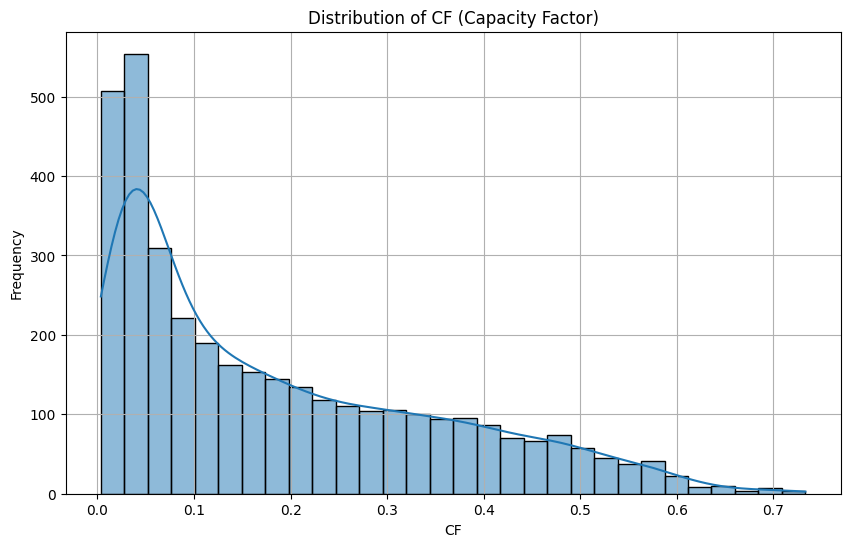

(count    3635.000000
 mean        0.186114
 std         0.165140
 min         0.003551
 25%         0.043264
 50%         0.130778
 75%         0.299374
 max         0.733128
 Name: CF, dtype: float64,
 0,
 0)

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics for the 'CF' target variable
cf_statistics = train_data['CF'].describe()

# Check for missing values in the dataset
missing_values_train = train_data.isnull().sum().sum()
missing_values_predict = predict_data.iloc[:,2:].isnull().sum().sum()

# Visualizing the distribution of the target variable 'CF'
plt.figure(figsize=(10, 6))
sns.histplot(train_data['CF'], bins=30, kde=True)
plt.title('Distribution of CF (Capacity Factor)')
plt.xlabel('CF')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

cf_statistics, missing_values_train, missing_values_predict


In [5]:
# Compute correlations between 'CF' and the wind speed features
correlations = train_data.drop(columns=['DATETIME']).corr()['CF'].sort_values()

# Display the highest and lowest correlations
high_corr = correlations.tail(10)  # Top 10 positive correlations
low_corr = correlations.head(10)   # Top 10 negative correlations

high_corr, low_corr


(WS_2217107    0.827572
 WS_631992     0.832899
 WS_77363      0.833789
 WS_75934      0.834120
 WS_75935      0.837190
 WS_75936      0.839991
 WS_2508545    0.840002
 WS_2508550    0.841939
 WS_2503597    0.848757
 CF            1.000000
 Name: CF, dtype: float64,
 WS_1358699   -0.169850
 WS_1953863    0.055221
 WS_1625374    0.068567
 WS_1681085    0.072676
 WS_2113254    0.151538
 WS_2385763    0.167350
 WS_1156968    0.170152
 WS_1911282    0.205853
 WS_1321569    0.227482
 WS_676278     0.251977
 Name: CF, dtype: float64)

In [26]:
from sklearn.model_selection import train_test_split

# Filter features based on a correlation threshold (|corr| > 0.5)
selected_features = correlations[correlations.abs() > 0.5].index.tolist()
selected_features.remove('CF')  # Remove the target variable from the features list

# Prepare the data
X = train_data[selected_features]
y = train_data['CF']

# Splitting the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Quick overview of the selected features and the data split
selected_features, X_train.shape, X_val.shape


(['WS_77720',
  'WS_594133',
  'WS_1625339',
  'WS_914573',
  'WS_751132',
  'WS_1820276',
  'WS_75955',
  'WS_1193865',
  'WS_1366351',
  'WS_1366338',
  'WS_593968',
  'WS_77985',
  'WS_1461024',
  'WS_73451',
  'WS_1820279',
  'WS_74180',
  'WS_2379547',
  'WS_1504146',
  'WS_1571308',
  'WS_75812',
  'WS_77740',
  'WS_745977',
  'WS_2467635',
  'WS_676534',
  'WS_875373',
  'WS_629008',
  'WS_629020',
  'WS_74124',
  'WS_1481513',
  'WS_883699',
  'WS_74158',
  'WS_74719',
  'WS_1156770',
  'WS_76003',
  'WS_1960535',
  'WS_2460378',
  'WS_78207',
  'WS_78205',
  'WS_77067',
  'WS_78208',
  'WS_76434',
  'WS_1369320',
  'WS_74884',
  'WS_1133733',
  'WS_609612',
  'WS_76004',
  'WS_74020',
  'WS_921049',
  'WS_1513782',
  'WS_920775',
  'WS_1513805',
  'WS_77682',
  'WS_75932',
  'WS_2455069',
  'WS_77683',
  'WS_77370',
  'WS_72721',
  'WS_839753',
  'WS_77080',
  'WS_75213',
  'WS_651000',
  'WS_75931',
  'WS_72720',
  'WS_1574484',
  'WS_78026',
  'WS_74243',
  'WS_76275',
  'WS

c:\Users\a9529\Downloads\Vistra ML Project\.conda\lib\site-packages\_distutils_hack\__init__.py:11: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
c:\Users\a9529\Downloads\Vistra ML Project\.conda\lib\site-packages\_distutils_hack\__init__.py:26: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


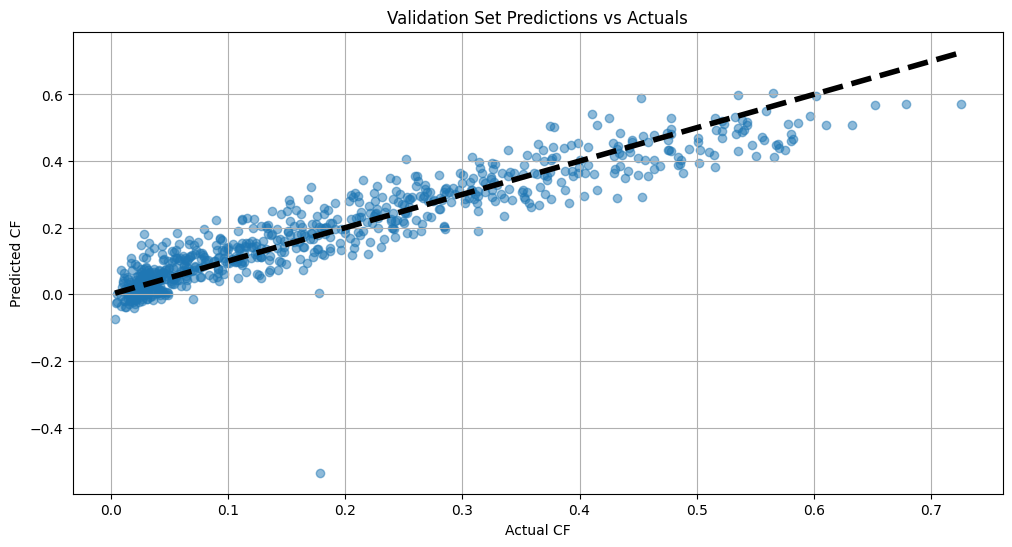

(0.041921875191236954, 0.042580605253279724, 0.00065873006204277)

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import mlflow

mlflow.set_experiment('PowerPredict_BaseLineModel')


with mlflow.start_run():
      # Initialize and train the linear regression model
      linear_model = LinearRegression()
      linear_model.fit(X_train, y_train)

      # Predict on the traning set
      y_train_pred = linear_model.predict(X_train)

      # Predict on the validation set
      y_val_pred = linear_model.predict(X_val)

      # Calculate the MAE on the traning set
      mae_train = mean_absolute_error(y_train, y_train_pred)

      # Calculate the MAE on the validation set
      mae_val = mean_absolute_error(y_val, y_val_pred)
      
      mlflow.log_param("ModelType", 'BaseLine_Linear')
      mlflow.log_metric("mae_train", mae_train)
      mlflow.log_metric("mae_val", mae_val)

      mlflow.sklearn.log_model(linear_model, "BaseLineLinearModel")



# Visualizing predictions vs actuals for the validation set
plt.figure(figsize=(12, 6))
plt.scatter(y_val, y_val_pred, alpha=0.5)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=4)  # Perfect predictions line
plt.xlabel('Actual CF')
plt.ylabel('Predicted CF')
plt.title('Validation Set Predictions vs Actuals')
plt.grid(True)
plt.show()

mae_val, mae_train, mae_train-mae_val